# Training Models



## Contents

- [Linear Regression](#linreg)
- [Regularised Linear Regression](#reglinreg)
- [Logistic Regression](#logreg)
- [Decision Trees](#dectree)


<a name="linreg"></a>
## Linear Regression

Equation 4-1. Linear Regression model prediction

$y = θ_{0} + θ_{1}x_{1} + θ_{2}x_{2} + ⋯ + θ_{n}x_{n}$

- ŷ is the predicted value.
- n is the number of features.
- $x_{i}$ is the ith feature value.
- $θ_{j}$ is the jth model parameter (including the bias term $θ_{0}$ and the feature weights $θ_{1} , θ_{2} , ⋯, θ_{n})$.


Equation 4-2. Linear Regression model prediction (vectorized form)

$y = hθ(x) = θ^{T}.x$


we use MSE cost Function and then minimise it.

$MSE (x , hθ) = \frac{∑(θ^{T}·x(i)− y(i))^2}{m}$

One way to do this is to use Normal Equation which directly gives us values of theta

$θ = ((X^{T}·X)^{-1}).X^{T}.y$

In [1]:
import numpy as np
import seaborn as sns
X=np.arange(100)
delta = np.random.uniform(-36,36, size=(100,))
y=4+3*X+delta
sns.scatterplot(data=y)

In [2]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([4.51347616, 2.99506489])

In [4]:
X_new = np.arange(100)
X_new_b = np.c_[np.ones((100, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)



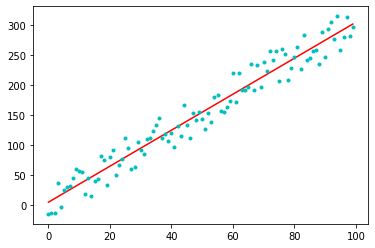

In [5]:
import matplotlib.pyplot as plt
plt.plot( y_predict, "r-")
plt.plot( y, "c.")
plt.show()

- The Normal Equation gets very slow when the number of features grows large (e.g., 100,000).

- The Normal Equation computes the inverse of $X^{T} · X$, which is an n × n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n 2.4) to O(n 3 ) (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly 22.4 = 5.3 to 23  = 8.
 
- On the positive side, this equation is linear with regards to the number of instances in the training set (it is O(m)), so it handles large training sets efficiently, provided they can fit in memory.



### Gradient Descent
Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. 

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.you start by filling θ with random values (this is called random initializa‐
tion), and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time.
On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution


### When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

# Batch Gradient Descent

___Code not Working___

probably not working because gradient descent requires scaled data and this is not scaled?

[[15.24191068]
 [15.20969908]]


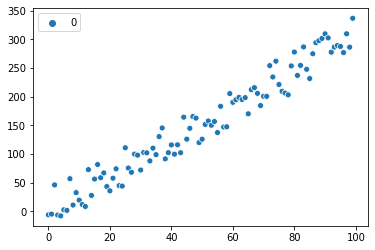

In [6]:
X=np.arange(100)
delta = np.random.uniform(-36,36,100)
y=4+3*X+delta
y=y.reshape((100,1))
sns.scatterplot(data=y)
X_b=np.c_[np.ones((100,1)),X]
eta = 0.1 # learning rate
n_iterations = 100
m = 100
theta = np.random.randn(2,1)+16
print(theta)# random initialization
# print(X_b.shape)
# print(X_b.T.shape)
# print(theta.shape)
# print(y.shape)
# print((np.subtract(np.dot(X_b,theta),y)).shape)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    #print(gradients.shape)
    theta = theta + eta*gradients


In [7]:

theta


array([[1.21084488e+281],
       [8.03131707e+282]])

# Stochastic Gradient Descent

- The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)
- On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down 

In [8]:
X_b=X_b.reshape(100,2)
y=y.reshape(100,1)

```python
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
```



### Mini-batch Gradient Descent



-  Mini-batch GD computes the gradients on small random sets of instances called minibatches
-  The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [9]:
"""
Algorithm           Large m     Out-of-core support      Large n     Hyperparams     Scaling required      Scikit-Learn
Normal Equation     Fast        No                       Slow        0               No                    LinearRegression
Batch GD            Slow        No                       Fast        2               Yes                   n/a
Stochastic GD       Fast        Yes                      Fast        ≥2              Yes                   SGDRegressor
Mini-batch GD       Fast        Yes                      Fast        ≥2              Yes                   n/a

"""

'\nAlgorithm           Large m     Out-of-core support      Large n     Hyperparams     Scaling required      Scikit-Learn\nNormal Equation     Fast        No                       Slow        0               No                    LinearRegression\nBatch GD            Slow        No                       Fast        2               Yes                   n/a\nStochastic GD       Fast        Yes                      Fast        ≥2              Yes                   SGDRegressor\nMini-batch GD       Fast        Yes                      Fast        ≥2              Yes                   n/a\n\n'

## Polynomial Regression
What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.


In [10]:
m = 100
X = np.arange(-100,100).reshape(200,1)
y = 0.5 * X**2 + X + 2 + 700*np.random.randn(200,1)

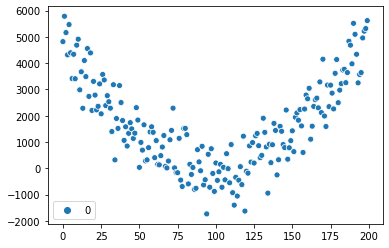

In [11]:
sns.scatterplot(data=y)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([-42.25567918]), array([[1.58865487, 0.51576824]]))

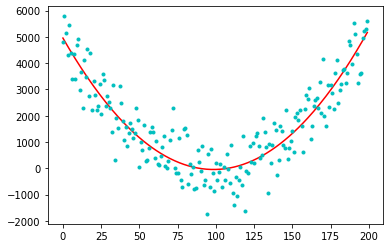

In [13]:
 # add x0 = 1 to each instance
y_predict = lin_reg.predict(X_poly)
plt.plot( y_predict, "r-")
plt.plot(y,"c.")
plt.show()

## Examples of Overfitting

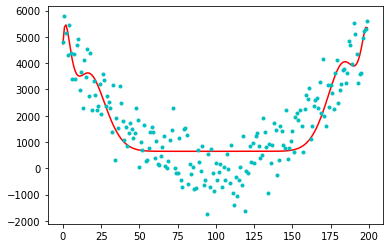

In [14]:
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
y_predict = lin_reg.predict(X_poly)
plt.plot( y_predict, "r-")
plt.plot(y,"c.")
plt.show()


### using pipelining for polynomial regression
```python
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("sgd_reg", LinearRegression()),
 ))
plot_learning_curves(polynomial_regression, X, y)
```


# About Learning Curves

### Learning curves code from Hands-On Ml

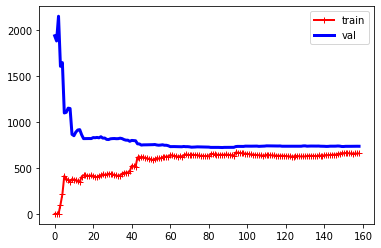

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

X = np.arange(-100,100).reshape(200,1)
y = 0.5 * X**2 + X + 2 + 700*np.random.randn(200,1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y)
plt.legend()

- One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error


__The Bias/Variance Tradeoff__
- a model’s generalization error can be expressed as the sum of three very different errors:

__Bais__
- This part of the generalization error is due to wrong assumptions, such as assum‐ ing that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

__Variance__
- This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data

__Irreducible error__
- This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers)

<a name="reglinreg"></a>
# Regularuized Linear Models

## Ridge Regression

_*Ridge Regression*_ (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $α∑θ(i)^{2}$
 is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

___It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models___

$J(θ)=MSE(θ)+α*0.5*∑θ(i)^{2}$


### Ridge Regression Closed Form

___$θ = ((X^{T}·X + αA)^{-1})·X^{T}·Y$___

A is the n × n identity matrix except with a 0 in the top-left cell, corresponding to the bias term

code example

```python
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
```


___In layman terms using ridge regression flattens the prediction line. 
write code to check this for yourself. plot prediction line for different values of alpha___


## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2
 norm 

$J(θ) = MSE(θ) + α∑|θ_{i}|$


### An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). 

```python
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
```

## Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression 

$J(θ) = MSE(θ) + rα∑|θ_{i}| + (\frac{(1 − r)}{2})*α∑(θ_{i})^{2}$
```python
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])
```

## Important(when to use what kind Of regression)

___It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the num‐ ber of features is greater than the number of training instances or when several fea‐ tures are strongly correlated.___


## Early Stopping


<a name="logreg"></a>
## Logistic Regression

__Logistic Regression__ (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?). If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.
> Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result

>  Logistic Regression model estimated probability (vectorized form)

$p = hθ(x) = σ(θ^{T}.x)$


The logistic—also called the logit, noted σ(·)—is a sigmoid function (i.e., S-shaped)
that outputs a number between 0 and 1. 


## Sigmoid Function


In [17]:
x=np.arange(-10,10).reshape(20,1)

In [18]:
sigma = 1/(1+np.exp(-1*x))

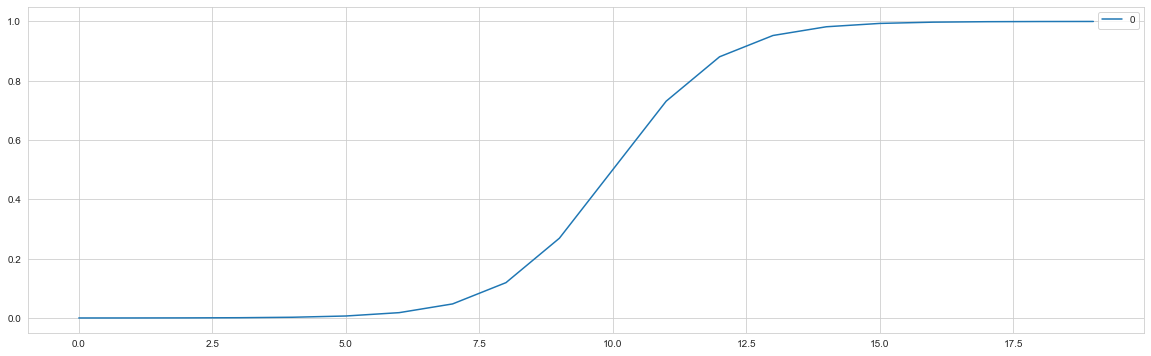

In [19]:
plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
sns.lineplot(data=sigma)

> Logistic Regression cost function (log loss)

$J(θ)= \frac{−1}{m∑(y(i)log(p(i))}+ (1 − y(i))log( 1 − p(i))$

> Logistic cost function partial derivatives

$(\frac{∂}{∂θj})(J(θ)) = (1/m) ∑ (σ(θ^{T}·x(i))− y(i))x_{j}(i)$

In [20]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
list(iris.keys())
x=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [22]:
log_reg.fit(x,y)

K:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

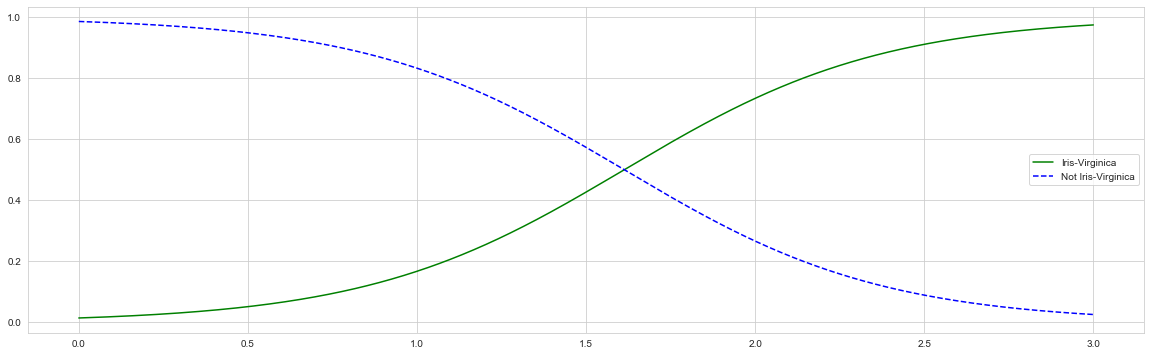

In [23]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.legend()
plt.show()

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers 
This is called Softmax Regression, or Multinomial Logistic Regression.
>  Softmax score for class k


$sk(x) = θ_{k}^{T}·x$


### Cross Entropy
Cross entropy originated from information theory. Suppose you want to efficiently
transmit information about the weather every day. If there are eight options (sunny,
rainy, etc.), you could encode each option using 3 bits since 23
 = 8. However, if you
think it will be sunny almost every day, it would be much more efficient to code
“sunny” on just one bit (0) and the other seven options on 4 bits (starting with a 1).
Cross entropy measures the average number of bits you actually send per option. If
your assumption about the weather is perfect, cross entropy will just be equal to the
entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assump‐
tions are wrong (e.g., if it rains often), cross entropy will be greater by an amount
called the Kullback–Leibler divergence.
The cross entropy between two probability distributions p and q is defined as
H p, q = − ∑x
p x log q x (at least when the distributions are discrete).


<a name="dectree"></a>
# Decision Trees

Decision Trees are versatile Machine Learning algorithms that can per‐
form both classification and regression tasks, and even multioutput tasks

In [24]:
# sklearn example for iris dataset w Decision Tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
tree_clf.score(X,y)

0.96

We can export Decision Tree graphs by using export_graphviz 

In [26]:
from sklearn import tree
from graphviz import Source
graph = Source(tree.export_graphviz(tree_clf, out_file="iris_tree.dot"
   , feature_names=iris.feature_names[2:], class_names=iris.target_names, 
   rounded=True, filled = True))
# display(SVG(graph.pipe(format='svg')))


## Use graphviz to convert following to png image using the following command in command line
dot -Tpng iris_tree.dot -o iris_tree.png


![](img/iris_tree.png)

> One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require feature
scaling or centering at all.

A node’s gini attribute measures its impur‐
ity: a node is “pure” (gini=0) if all training instances it applies to belong to the same
class. For example, since the depth-1 left node applies only to Iris-Setosa training
instances, it is pure and its gini score is 0.

$Gi = 1 − ∑(pi, k^{2})$ 

- pi,k is the ratio of class k instances among the training instances in the $i^{th}$ node

> Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two chil‐
dren.


# Estimating Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a partic‐
ular class k: first it traverses the tree to find the leaf node for this instance, and then it
returns the ratio of training instances of class k in this node. For example, suppose
you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corre‐
sponding leaf node is the depth-2 left node, so the Decision Tree should output the
following probabilities: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54),
and 9.3% for Iris-Virginica (5/54). And of course if you ask it to predict the class, it
should output Iris-Versicolor (class 1) since it has the highest probability. 

In [38]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

# Under the Hood for Decision Tree

-  Uses the Classification and Regression tree algorithm to train Decision trees;CART Training Algorithm.
- The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk.(e.g., “petal length ≤ 2.45 cm”). How does it choose k and tk ? It searches for the pair (k, tk) that produces the purest subsets (weighted by their size). The cost function is 

![](img/DecisionTreeEQ.png)

It stops recursing once it rea‐
ches the maximum depth (defined by the max_depth hyperparameter), or if it cannot
find a split that will reduce impurity
> the CART algorithm is a greedy algorithm: it greed‐
ily searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.


In [39]:
m = 100
X = np.arange(-100,100).reshape(200,1)
y = 0.5 * X**2 + X + 2 + 700*np.random.randn(200,1)

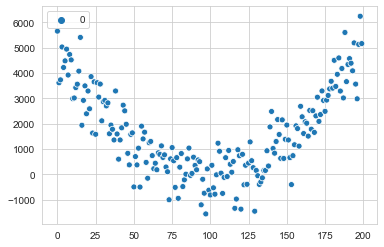

In [40]:
sns.scatterplot(data=y)

In [41]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
y_new=tree_reg.predict(X)

## Plot for Depth=2

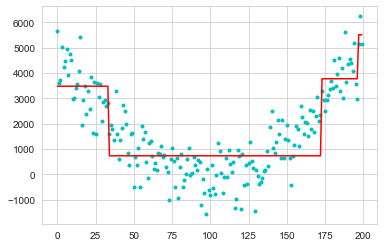

In [43]:
import matplotlib.pyplot as plt
plt.plot(y,"c.")
plt.plot(y_new,"r-")

## Plot for depth=10

### Is this overfit? try increasing max_depth for clear idea

In [44]:
tree_reg2=DecisionTreeRegressor(max_depth=5)

In [45]:
tree_reg2.fit(X,y)
y_new2=tree_reg2.predict(X)

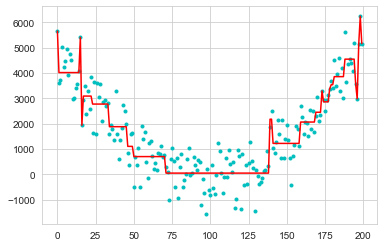

In [46]:
plt.plot(y,"c.")
plt.plot(y_new2,"r-")

The CART algorithm works mostly the same way as earlier, except that instead of try‐
ing to split the training set in a way that minimizes impurity, it now tries to split the
training set in a way that minimizes the MSE.

![](img/DecisionTreeREGEQ.png)

using a reularization Hyperparameter we can fit data better

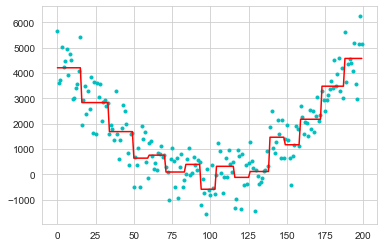

In [47]:
tree_reg2=DecisionTreeRegressor(min_samples_leaf=10)
tree_reg2.fit(X,y)
y_new2=tree_reg2.predict(X)
plt.plot(y,"c.")
plt.plot(y_new2,"r-")

## Regularization Hyperparameters

Decision Trees make very few assumptions about the training data (as opposed to lin‐
ear models, which obviously assume that the data is linear, for example). If left
unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a nonparametric
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).
To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.
The DecisionTreeClassifier class has a few other parameters that similarly restrict
the shape of the Decision Tree: min_samples_split (the minimum number of samples a node must have before it can be split), min_samples_leaf (the minimum num‐
ber of samples a leaf node must have), min_weight_fraction_leaf (same as
min_samples_leaf but expressed as a fraction of the total number of weighted
instances), max_leaf_nodes (maximum number of leaf nodes), and max_features
(maximum number of features that are evaluated for splitting at each node). Increas‐
ing min_* hyperparameters or reducing max_* hyperparameters will regularize the
model.
> Other algorithms work by first training the Decision Tree without
restrictions, then pruning (deleting) unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the
purity improvement it provides is not statistically significant. Stan‐
dard statistical tests, such as the χ
2
test, are used to estimate the
probability that the improvement is purely the result of chance
(which is called the null hypothesis). If this probability, called the pvalue, is higher than a given threshold (typically 5%, controlled by
a hyperparameter), then the node is considered unnecessary and its
children are deleted. The pruning continues until all unnecessary
nodes have been pruned.

# Instability 

- Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.
>One way to limit this problem is to use PCA(Dimensionality reduction algorithm).
-  Decision Trees is that they are very sensitive to small variations in the training data. 
- the training algorithm used by Scikit-Learn is stochastic6 you may get very different models even on the same training data (unless you set the random_state hyperparameter).
